In [1]:
import os
import numpy as np
import pandas as pd
import joblib
import sys
sys.path.append('..')
from data_preprocess import *
from utils import get_config

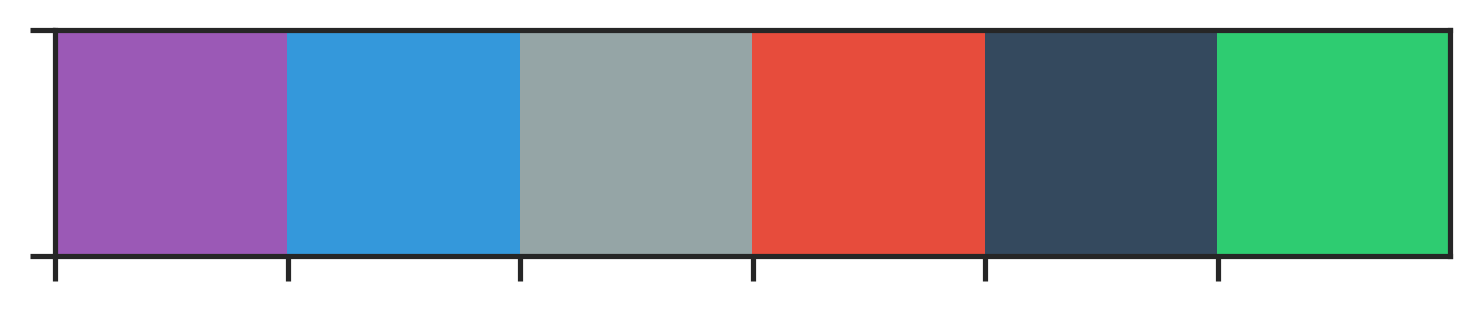

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
rc={'font.size': 14, 'axes.labelsize': 14, 'legend.fontsize': 14.0, 
    'axes.titlesize': 14, 'xtick.labelsize': 14, 'ytick.labelsize': 14, 'figure.figsize':(10,8), 'figure.dpi':300}
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set(style='ticks',rc=rc)
sns.palplot(sns.color_palette(flatui))

In [3]:
seq_type = 'tp'
chr = '21'

In [9]:
import glob
def _load_seq_features(in_df, train=True):

    aneu_conf = get_config()
    seq_out_root_dir = os.path.join(aneu_conf['data_dir']['data_root_dir'], 'corrgc_bams')
    seq_feat_lst = []
    y_label_lst = []
    for index, row in in_df.iterrows():
        sample_id = row['Sample_id']
        feature_fname = glob.glob(os.path.join(seq_out_root_dir, sample_id, '*.features'))[0]
        # logging.info(feature_fname)
        seq_feat_lst.append(load_seq_feature(feature_fname))
        if train:
            y_label = row['Label']
            y_label_lst.append(y_label)

    return np.array(seq_feat_lst), np.array(y_label_lst, dtype=int) if train else None, in_df['Sample_id'].values




In [10]:
_neg_df = get_tn_sample_4train(reload=True)
_pos_df = get_sample_info(reload=True, seq_type='tp', chr=chr)

pos_df = _pos_df[['Sample_id']].copy()
pos_df['Label'] = np.ones(len(_pos_df))

neg_df = _neg_df[['Sample_id']].copy()
neg_df['Label'] = np.zeros(len(_neg_df))

train_df = pd.concat([pos_df, neg_df], ignore_index=True)
train_seq_arr, train_y, _ = _load_seq_features(train_df)

In [11]:
train_seq_arr.shape

(2805, 85, 9)

In [12]:
rc = train_seq_arr[..., 0]

In [16]:
rc_pos = rc[train_y==1]

In [18]:
rc_neg = rc[train_y==0]

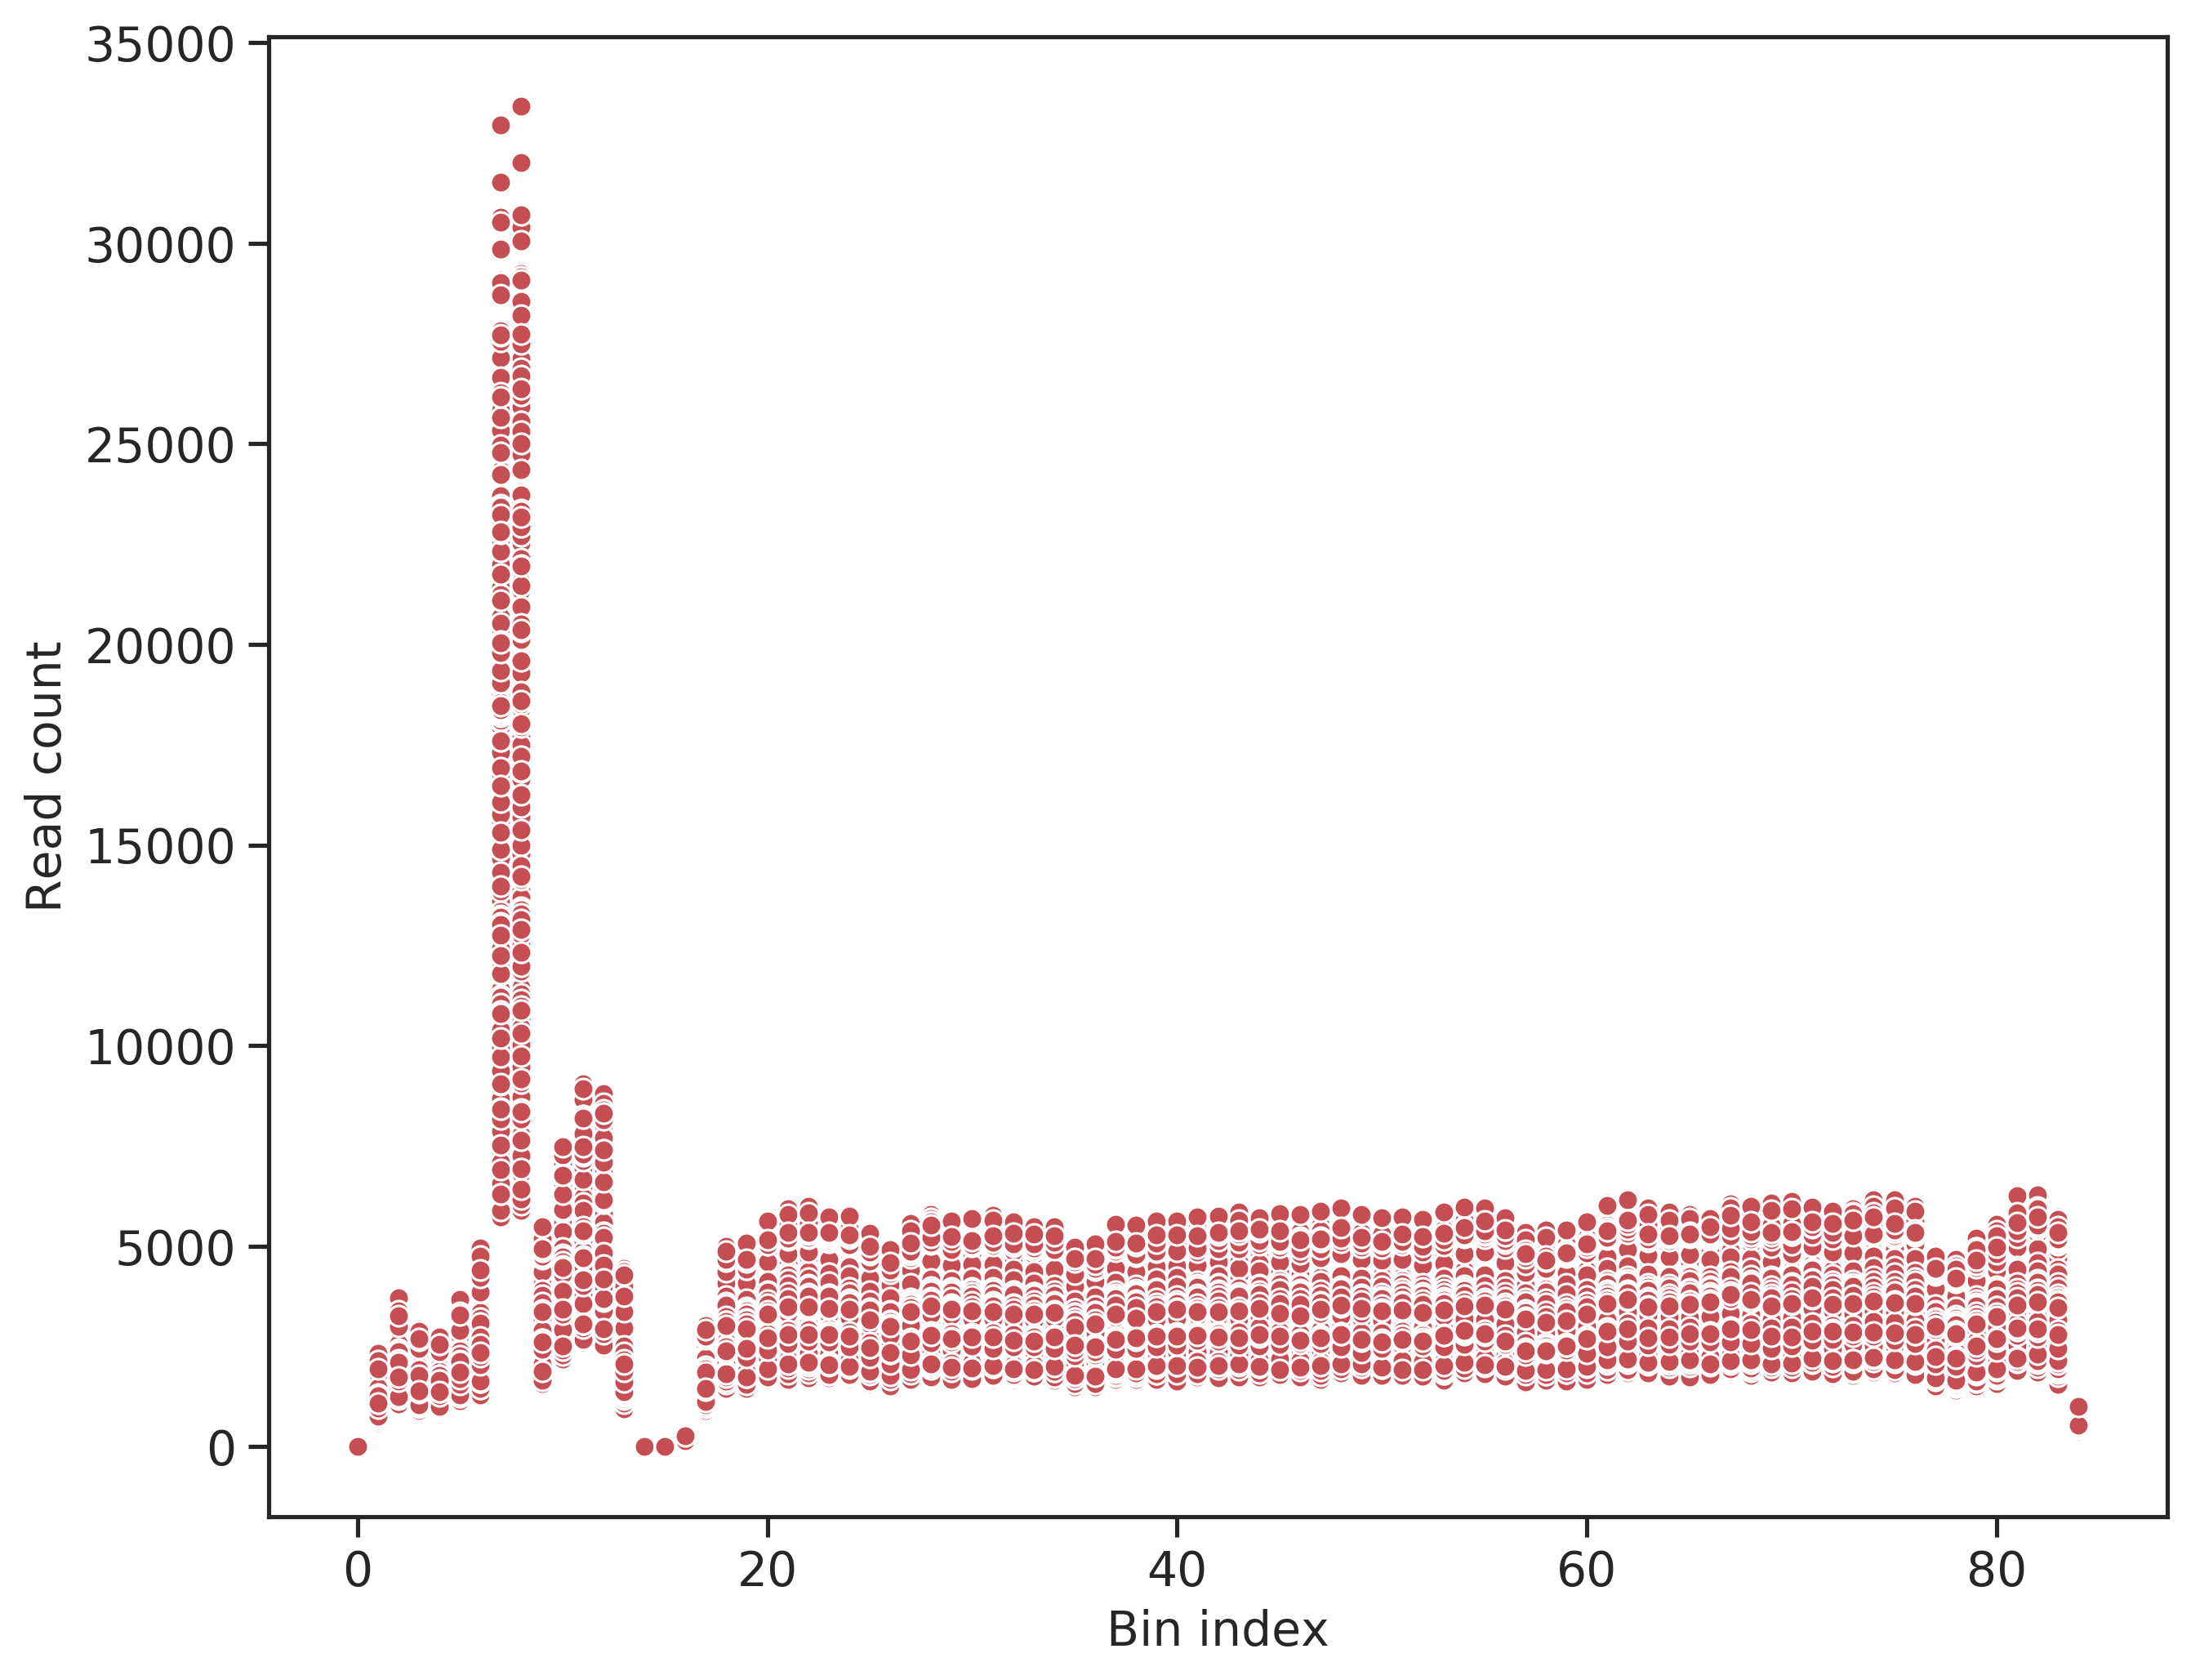

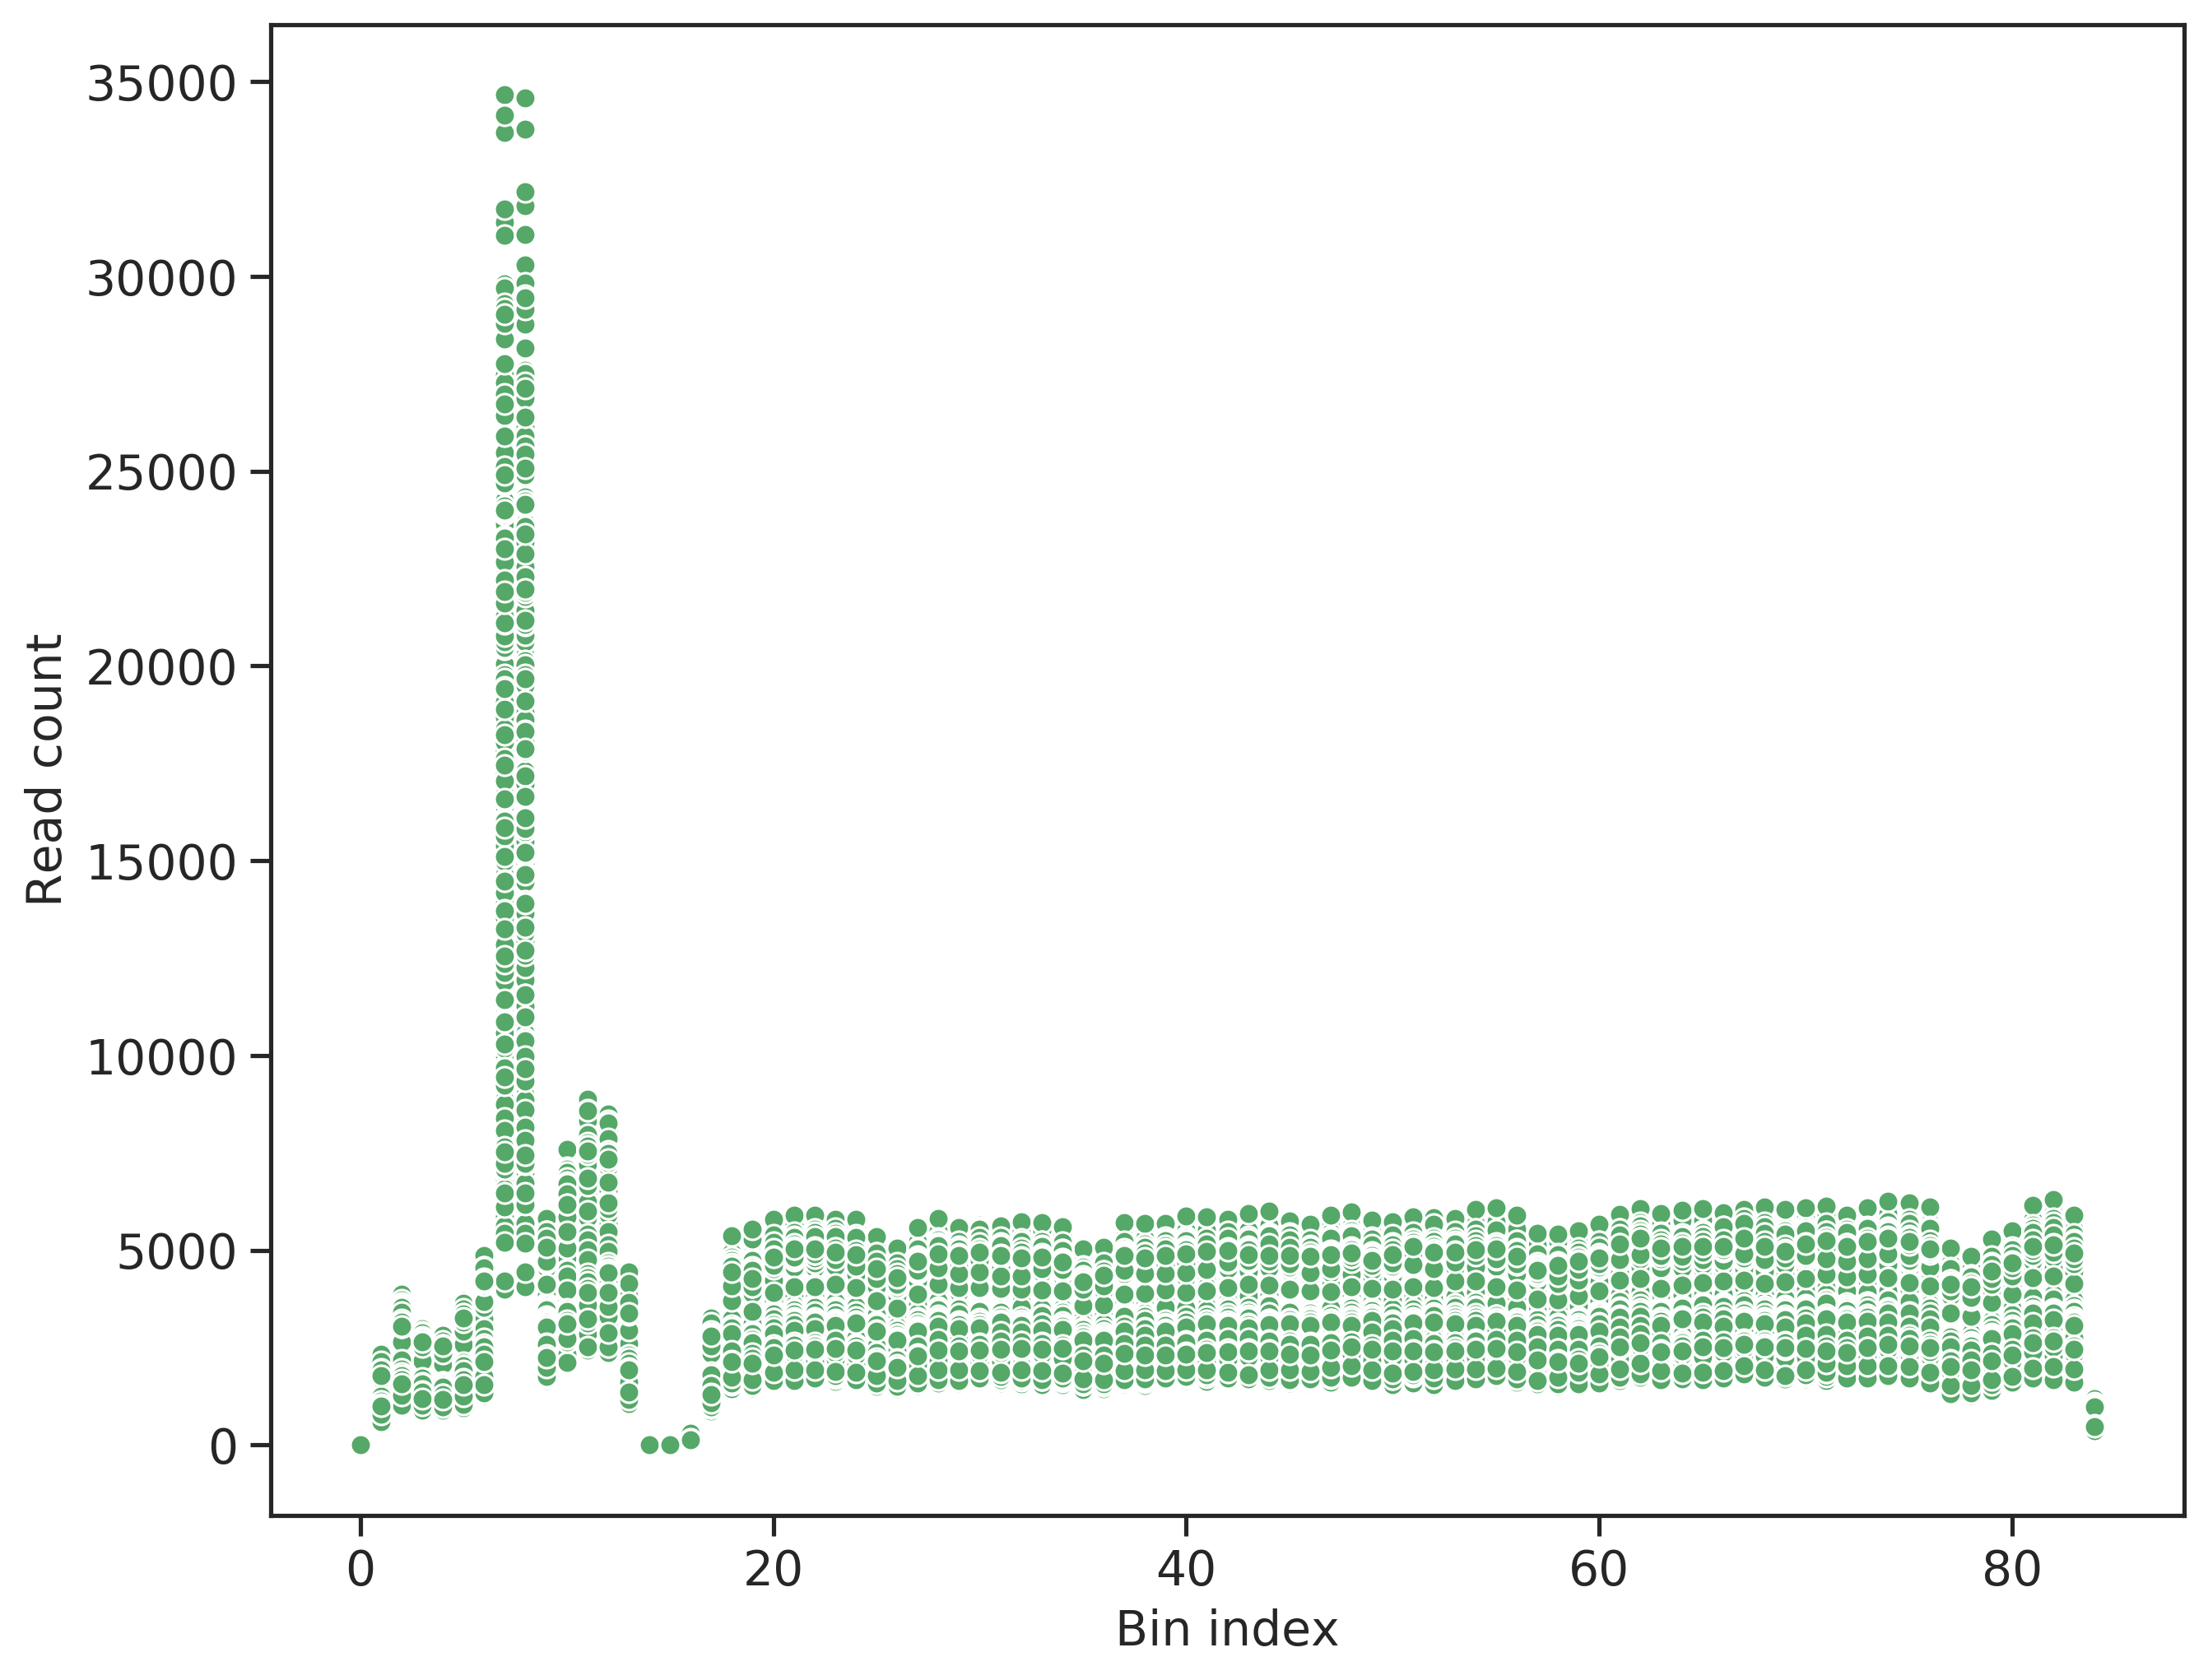

In [30]:
x = range(rc_pos.shape[1])
fig, ax = plt.subplots()
for i in range(len(rc_pos)):
    sns.scatterplot(x = x, y = rc_pos[i], color="r")

ax.set_xlabel('Bin index');
ax.set_ylabel('Read count');

fig, ax = plt.subplots()
for i in range(len(rc_neg)):
    sns.scatterplot(x = x, y = rc_neg[i], color="g")


ax.set_xlabel('Bin index');
ax.set_ylabel('Read count');